<a href="https://colab.research.google.com/github/AnovaYoung/SchoolProjects/blob/main/Deep_Learning_for_Regression_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PART 1: REGRESSION PROBLEM

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import boston_housing

# Load the Boston Housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Check the shape of the training and testing data
print(f'Training data shape: {train_data.shape}')
print(f'Training targets shape: {train_targets.shape}')
print(f'Testing data shape: {test_data.shape}')
print(f'Testing targets shape: {test_targets.shape}')

# Show the first few rows of the training data
print('\nFirst few rows of training data:')
print(train_data[:5])

# And the first few target values
print('\nFirst few target values:')
print(train_targets[:5])


57026/57026 [==============================] - 0s 1us/step
Training data shape: (404, 13)
Training targets shape: (404,)
Testing data shape: (102, 13)
Testing targets shape: (102,)

First few rows of training data:
[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+

**The shapes of the data:**

Training data: 404 samples, each with 13 features.

Training targets: 404 samples, each representing the median value of a home.

Testing data: 102 samples, each with 13 features.

Testing targets: 102 samples, each representing the median value of a home.

The first few rows of the training data show the feature values for the first five houses.

The first few target values are the median home values (in thousands of dollars) for those same five houses.

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Check the first few rows of the scaled training data to make sure it worked
print('First few rows of scaled training data:')
print(train_data[:5])


First few rows of scaled training data:
[[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
   0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
  -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  -0.25683275  0.62864202 -1.82968811
   1.11048828 -1.18743907  1.67588577  1.5652875   0.78447637  0.22061726
  -1.30850006]
 [-0.40149354 -0.48361547 -0.86940196 -0.25683275 -0.3615597  -0.3245576
  -1.23667187  1.10717989 -0.51114231 -1.094663    0.78447637  0.44807713
  -0.65292624]
 [-0.0056343  -0.48361547  1.0283258  -0.25683275  1.32861221  0.15364225
   0.69480801 -0.57857203  1.67588577  1.5652875   0.78447637  0.3898823
   0.26349695]]


Summary statistics of the features and target variable:
               CRIM            ZN         INDUS          CHAS           NOX  \
count  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02   
mean  -1.055261e-16 -1.319077e-17  1.789548e-15 -3.077846e-17 -5.219147e-15   
std    1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00   
min   -4.051005e-01 -4.836155e-01 -1.564696e+00 -2.568327e-01 -1.471269e+00   
25%   -3.969615e-01 -4.836155e-01 -8.782218e-01 -2.568327e-01 -8.908055e-01   
50%   -3.766520e-01 -4.836155e-01 -2.079167e-01 -2.568327e-01 -1.652266e-01   
75%   -7.617386e-03  4.296024e-02  1.028326e+00 -2.568327e-01  6.286420e-01   
max    9.234847e+00  3.728990e+00  2.445374e+00  3.893584e+00  2.677335e+00   

                 RM           AGE           DIS         RAD           TAX  \
count  4.040000e+02  4.040000e+02  4.040000e+02  404.000000  4.040000e+02   
mean   6.404118e-15  2.682123e-16  5.452184e-16    0.000000 -1.802738e-16   
s

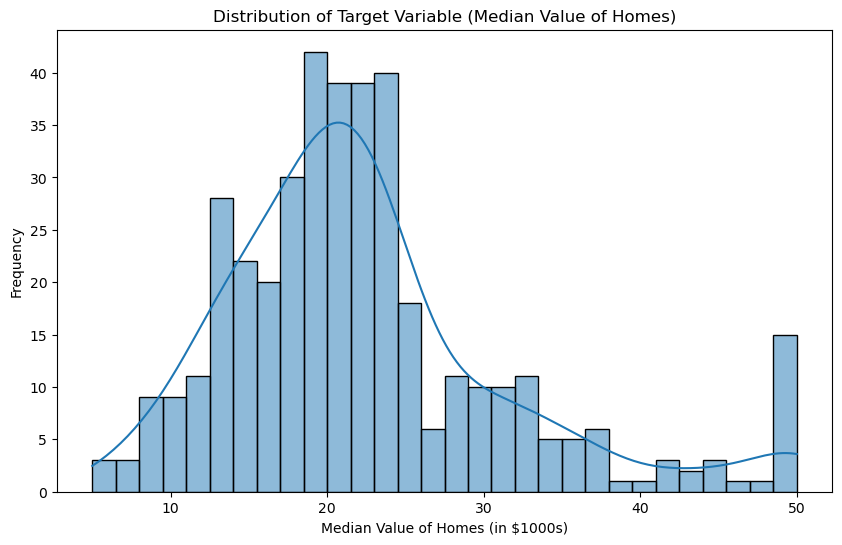

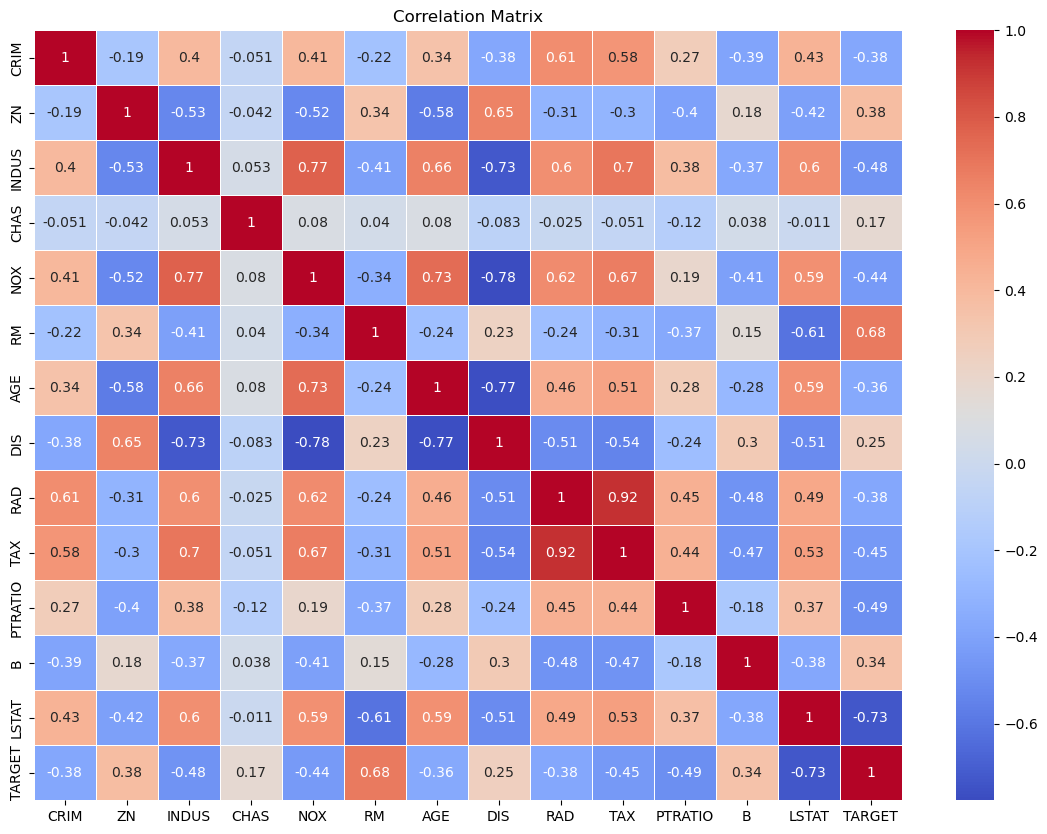

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the data to a DataFrame to read easier
train_df = pd.DataFrame(train_data, columns=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
])
train_df['TARGET'] = train_targets

# Summary statistics of the features and target variable
print("Summary statistics of the features and target variable:")
print(train_df.describe())

# Distribution of the target variable (median value of homes)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['TARGET'], bins=30, kde=True)
plt.title('Distribution of Target Variable (Median Value of Homes)')
plt.xlabel('Median Value of Homes (in $1000s)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix of the features and target variable
plt.figure(figsize=(14, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## EDA RESULTS

**Distribution of Target Variable:**

The distribution of the target variable (median value of homes) is pretty normal but slightly right-skewed.
There is a noticeable peak at the value of 50, which could suggest a cap in the dataset for very expensive homes.

**Summary Statistics:**

The features are standardized, which means their mean is close to 0 and the standard deviation is close to 1.
The target variable has a mean of around 22.39 and a standard deviation of 9.21.

**Correlation Matrix:**

The correlation matrix shows the relationships between the features and the target variable.
The RM (average number of rooms per dwelling) feature has a strong positive correlation with the target variable (0.68).
The LSTAT (percentage of lower status of the population) feature has a strong negative correlation with the target variable (-0.73).
Other features like PTRATIO, NOX, and TAX also show significant correlations.


## DEEP NEURAL NET ARCHITECTURE FOR REGRESSION

Since I already have separate training and testing sets, I can go straight into the model architecture.

I'm going to create a simple neural network using Keras.

In [ ]:
from keras.optimizers.legacy import Adam

# Define the architecture of the regression model
def build_regression_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Single output for regression
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Building the model
regression_model = build_regression_model()

regression_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**The model consists of two hidden layers with 64 neurons each and ReLU activation functions.**

**The output layer has a single neuron (since it’s a regression problem) without an activation function.**

In [ ]:
# Train the model
history = regression_model.fit(train_data, train_targets, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model on test set
test_loss, test_mae = regression_model.evaluate(test_data, test_targets)

print(f'Test MAE: {test_mae:.2f}')

Epoch 1/100
11/11 [==============================] - 0s 9ms/step - loss: 556.9929 - mae: 21.7266 - val_loss: 604.0013 - val_mae: 22.8197
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 518.3475 - mae: 20.8555 - val_loss: 560.7127 - val_mae: 21.8998
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 474.2336 - mae: 19.8342 - val_loss: 505.5573 - val_mae: 20.6750
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 417.8022 - mae: 18.4596 - val_loss: 432.3439 - val_mae: 18.9494
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 342.9492 - mae: 16.5084 - val_loss: 339.7381 - val_mae: 16.5311
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 250.2466 - mae: 13.7802 - val_loss: 236.0921 - val_mae: 13.2321
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 163.8647 - mae: 10.6185 - val_loss: 147.8955 - val_mae: 9.6794
Epoch 8/100
11/11 [=======================

The model's performance on the test set shows a Mean Absolute Error (MAE) of 3.11, which means that on average the predictions are off by around $3,110.

## HYPERPARAMETER TUNING

I will use the same training and evaluation procedure but vary the hyperparameters.

In [ ]:
# Define the model with different architecture
def build_tuned_regression_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(train_data.shape[1],)))  # Increased neurons
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))  # Added an extra hidden layer
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Build the tuned model
tuned_regression_model = build_tuned_regression_model()

# Train new model
history_tuned = tuned_regression_model.fit(train_data, train_targets, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on test set
test_loss_tuned, test_mae_tuned = tuned_regression_model.evaluate(test_data, test_targets)

print(f'Tuned Test MAE: {test_mae_tuned:.2f}')


Epoch 1/100
11/11 [==============================] - 0s 8ms/step - loss: 550.1748 - mae: 21.6140 - val_loss: 592.4342 - val_mae: 22.5653
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 496.1289 - mae: 20.3494 - val_loss: 518.0104 - val_mae: 20.8873
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 404.1810 - mae: 18.0331 - val_loss: 385.8494 - val_mae: 17.6136
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 252.8768 - mae: 13.7131 - val_loss: 198.8985 - val_mae: 11.6062
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 105.4200 - mae: 8.0235 - val_loss: 90.7682 - val_mae: 7.3468
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 76.7900 - mae: 6.8085 - val_loss: 68.3563 - val_mae: 6.3989
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 49.2280 - mae: 5.3365 - val_loss: 47.2858 - val_mae: 5.1774
Epoch 8/100
11/11 [==============================] -

**The tuned model shows an improvement with a test Mean Absolute Error (MAE) of 2.85, compared to the baseline model's MAE of 3.11.**

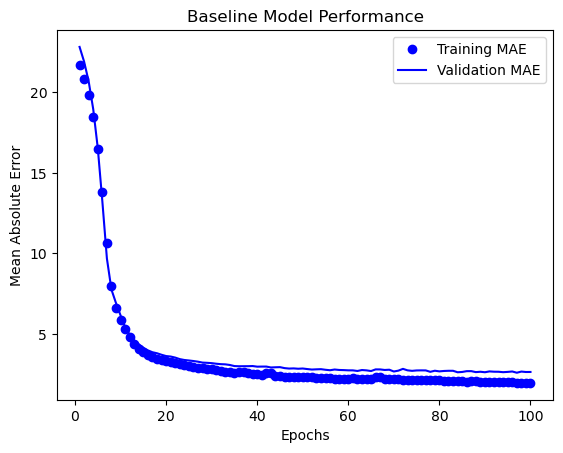

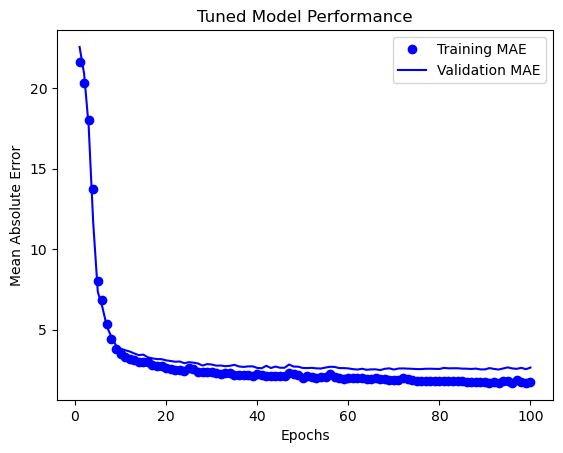

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.plot(epochs, history.history['mae'], 'bo', label='Training MAE')
    plt.plot(epochs, history.history['val_mae'], 'b', label='Validation MAE')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.show()

# Plot baseline model history
plot_history(history, 'Baseline Model Performance')

# Plot tuned model history
plot_history(history_tuned, 'Tuned Model Performance')


## PART 2: CLASSIFICATION PROBLEM

In [ ]:
# Convert target variable to binary: 1 if expensive, 0 if not
median_value = np.median(train_targets)
binary_train_targets = (train_targets > median_value).astype(int)
binary_test_targets = (test_targets > median_value).astype(int)

print(f'Binary Train Targets: {np.bincount(binary_train_targets)}')
print(f'Binary Test Targets: {np.bincount(binary_test_targets)}')


Binary Train Targets: [202 202]
Binary Test Targets: [39 63]


## DEEP NEURAL NET FOR CLASSIFICATION

In [ ]:
from keras.layers import Dropout

# Define the architecture of the classification model
def build_classification_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dropout(0.5))  # Adding dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Building model
classification_model = build_classification_model()

classification_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**The model consists of two hidden layers with 64 neurons each, followed by dropout layers for regularization.**

**The output layer uses a sigmoid activation function for binary classification.**


In [ ]:
# Train the model
history_classification = classification_model.fit(
    train_data, binary_train_targets,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate on the test data
test_loss_classification, test_accuracy_classification = classification_model.evaluate(test_data, binary_test_targets)

print(f'Test Accuracy: {test_accuracy_classification:.2f}')


Epoch 1/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7531 - accuracy: 0.5108 - val_loss: 0.5944 - val_accuracy: 0.8025
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.6749 - val_loss: 0.5261 - val_accuracy: 0.8272
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7337 - val_loss: 0.4872 - val_accuracy: 0.8272
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7709 - val_loss: 0.4552 - val_accuracy: 0.8025
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.8080 - val_loss: 0.4320 - val_accuracy: 0.8025
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.8019 - val_loss: 0.4172 - val_accuracy: 0.8272
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8173 - val_loss: 0.4034 - val_accuracy: 0.8272
Epoch 8/100
1

Test Accuracy: 89%

Very strong performance for the classification task.

Similar to the regression problem, I'm going to attempt to improve the classification model's performance through hyperparameter tuning.

## HYPERPARAMETER TUNING

In [ ]:
# Define the tuned model with different architecture
def build_tuned_classification_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(train_data.shape[1],)))  # Increased neurons
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))  # adding extra hidden layer here
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# tuned model
tuned_classification_model = build_tuned_classification_model()

# train the tuned model
history_tuned_classification = tuned_classification_model.fit(
    train_data, binary_train_targets,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

test_loss_tuned_classification, test_accuracy_tuned_classification = tuned_classification_model.evaluate(test_data, binary_test_targets)

print(f'Tuned Test Accuracy: {test_accuracy_tuned_classification:.2f}')


Epoch 1/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7326 - accuracy: 0.5108 - val_loss: 0.5839 - val_accuracy: 0.8148
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.6285 - val_loss: 0.5280 - val_accuracy: 0.7901
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5799 - accuracy: 0.7121 - val_loss: 0.4859 - val_accuracy: 0.7901
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7461 - val_loss: 0.4543 - val_accuracy: 0.7901
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7523 - val_loss: 0.4337 - val_accuracy: 0.8025
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8111 - val_loss: 0.4156 - val_accuracy: 0.8148
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8204 - val_loss: 0.3978 - val_accuracy: 0.8272
Epoch 8/100
1

Baseline Model Test Accuracy: 89%

Tuned Model Test Accuracy: 85%

Despite the tuned model incorporating an additional hidden layer and more neurons, it didn't outperform the baseline model. This is a great demonstration on how a more complex model does not guarantee better results!

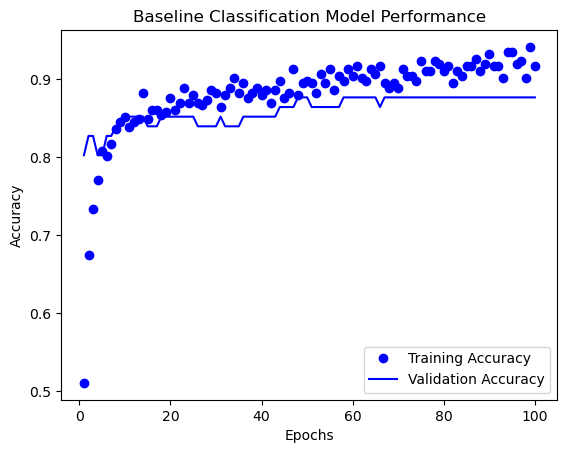

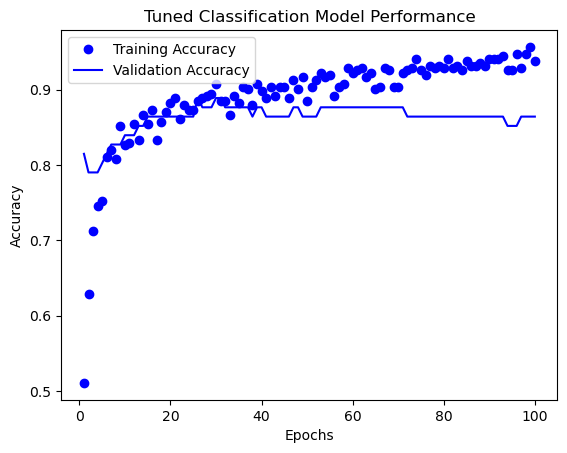

In [ ]:
def plot_classification_history(history, title):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], 'bo', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot baseline classification
plot_classification_history(history_classification, 'Baseline Classification Model Performance')

# Plot tuned classification
plot_classification_history(history_tuned_classification, 'Tuned Classification Model Performance')


### CONCLUSION AND FUTURE WORK

In this project, I explored the use of deep neural networks to tackle both regression and classification problems using the Boston Housing dataset. For the regression task, I developed a baseline model that achieved a Mean Absolute Error of 3.11, which was further improved to 2.85 through hyperparameter tuning. In the classification task, my baseline model achieved an accuracy of 89%, but further tuning resulted in a slight drop to 85%. These results demonstrate the effectiveness of neural networks in predicting continuous and categorical outcomes from structured data. However, the tuning process revealed that more complex models do not always yield better performance. Future work will focus on experimenting with other architectures, such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), implementing advanced regularization techniques, and leveraging ensemble methods to further enhance model performance. Additionally, cross-validation and more extensive hyperparameter searches would provide a more robust and wholesome assessment of my model's capabilities.